### NCAA basketball pool
##### There are 64 teams who play single elimination tournament, hence 6 rounds, and you have to predict all the winners in all 63 games. Your score is then computed as follows: 32 points for correctly predicting the final winner, 16 points for each correct finalist, and so on, down to 1 point for every correctly predicted winner for the first round. (The maximum number of points you can get is thus 192.) Knowing nothing about any team, you flip fair coins to decide every one of your 63 bets. Compute the expected number of points.


In [39]:
# Math solution

In [40]:
# Monte Carlo solution

import numpy as np
from matplotlib import pyplot as plt

# simulate random tournaments
n_sims = 20000
points = np.zeros(n_sims)

for i in range(n_sims):
    teams = np.random.permutation(64)
    # now the games
    teams_32 = np.array([np.random.choice(pair) for pair in teams.reshape(-1, 2)])
    teams_32_prediction = np.array([np.random.choice(pair) for pair in teams.reshape(-1, 2)])
    common_elements = np.intersect1d(teams_32, teams_32_prediction)
    num_common_elements = common_elements.size
    for j in range(num_common_elements): points[i] += 1
    
    teams_16 = np.array([np.random.choice(pair) for pair in teams_32.reshape(-1, 2)])
    teams_16_prediction = np.array([np.random.choice(pair) for pair in teams_32.reshape(-1, 2)])
    common_elements = np.intersect1d(teams_16, teams_16_prediction)
    num_common_elements = common_elements.size
    for j in range(num_common_elements): points[i] += 2
    
    teams_8 = np.array([np.random.choice(pair) for pair in teams_16.reshape(-1, 2)])
    teams_8_prediction = np.array([np.random.choice(pair) for pair in teams_16.reshape(-1, 2)])
    common_elements = np.intersect1d(teams_8, teams_8_prediction)
    num_common_elements = common_elements.size
    for j in range(num_common_elements): points[i] += 4
    
    teams_4 = np.array([np.random.choice(pair) for pair in teams_8.reshape(-1, 2)])
    teams_4_prediction = np.array([np.random.choice(pair) for pair in teams_8.reshape(-1, 2)])
    common_elements = np.intersect1d(teams_4, teams_4_prediction)
    num_common_elements = common_elements.size
    for j in range(num_common_elements): points[i] += 8
    
    teams_2 = np.array([np.random.choice(pair) for pair in teams_4.reshape(-1, 2)])
    teams_2_prediction = np.array([np.random.choice(pair) for pair in teams_4.reshape(-1, 2)])
    common_elements = np.intersect1d(teams_2, teams_2_prediction)
    num_common_elements = common_elements.size
    for j in range(num_common_elements): points[i] += 16
    
    winner = np.array([np.random.choice(pair) for pair in teams_2.reshape(-1, 2)])
    winner_prediction = np.array([np.random.choice(pair) for pair in teams_2.reshape(-1, 2)])
    if winner == winner_prediction: points[i] += 32

#

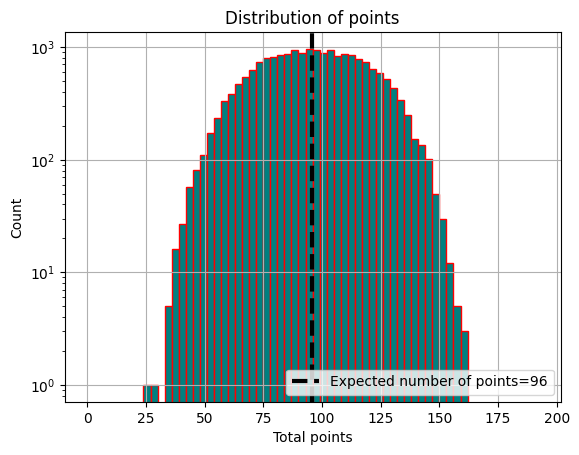

In [43]:
# plot distribution of points
plt.hist(points, bins=range(0, 193, 3), color='teal', edgecolor='red')
plt.axvline(x=np.mean(points), color='black', linestyle='dashed', linewidth=3, label='Expected number of points={}'.format(round(np.mean(points))))
plt.title('Distribution of points')
plt.xlabel('Total points')
plt.ylabel('Count')
plt.yscale('log')
plt.grid('both')
plt.legend(loc='lower right')
plt.show()